In [54]:
import pandas as pd
from sklearn.datasets import load_wine
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
wine = load_wine(as_frame=True)

In [3]:
X = wine.data

In [13]:
column_names = [x for x in X.columns]
column_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

## EDA

In [70]:
# Get subplot coordinates function I created for another project. 
# Its changed slightly for each application, in this instance the 12 loops are unique for this 
# project
def gets_subplot_coords(df):
    coords = []
    m=0
    n=0
    for i in range(0,13):
        coords.append([m,n])
        n+=1
        if n in [3,6,9,12]:
            m+=1
            n=0
    return coords

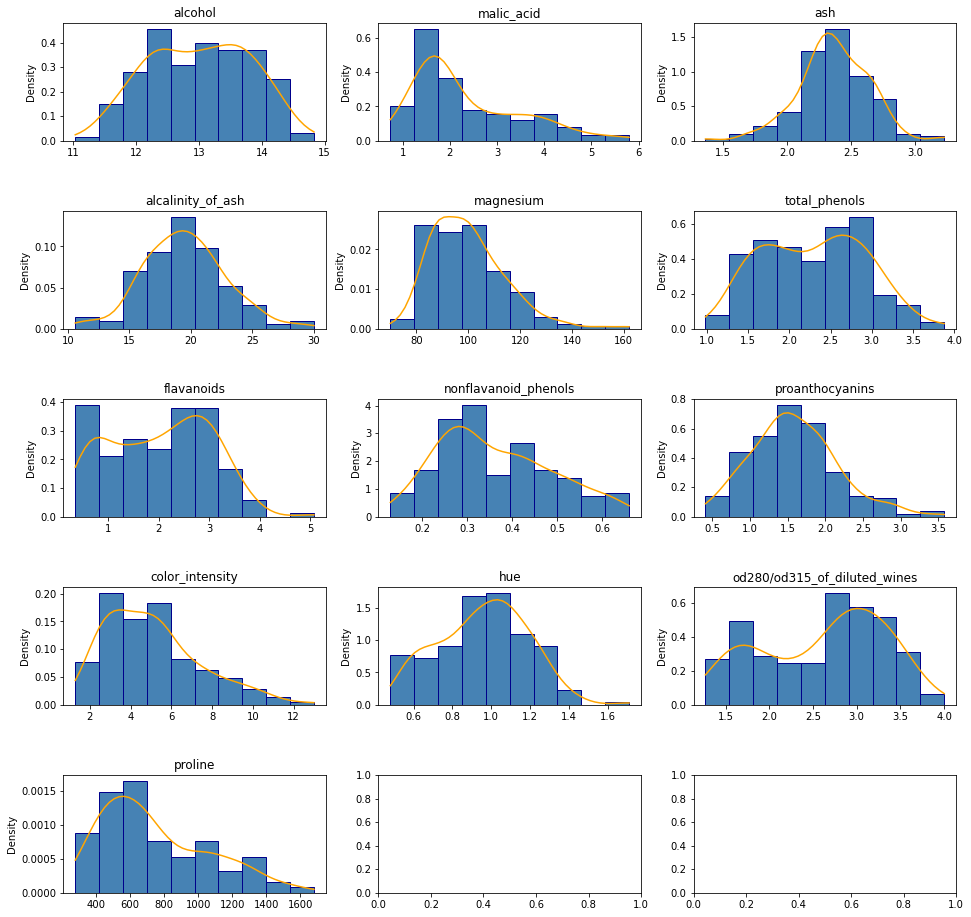

In [71]:
fig, axs = plt.subplots(nrows = 5, ncols = 3, figsize = (16,16))
ax_coords = gets_subplot_coords(X)
index = 0

for feature in X:

    loc = ax_coords[index]
    # Plot hist for weekly spread_diff with bins [min...max]
    axs[loc[0], loc[1]].hist(x = X[feature], bins = 10, density = True, 
                                     color = "steelblue", ec = "darkblue")
    min_ = min( X[feature] )
    max_ = max( X[feature] )
    # Create KDE object, interval
    kde = stats.gaussian_kde(X[feature])
    xx = np.linspace(min_, max_)

    # Fit KDE to hist
    axs[loc[0], loc[1]].plot(xx, kde(xx), color = "orange")

    # Set axis settings
    axs[loc[0], loc[1]].set_title(str(feature))
    axs[loc[0], loc[1]].set_ylabel('Density')
    
    # Adjust spacing for overlap
    fig.subplots_adjust(hspace = 0.6)
    
    index+=1
    

In [7]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Standardize Data

In [68]:
scaler = StandardScaler()
scale_X = pd.DataFrame(scaler.fit_transform(X))
scale_X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [69]:
scale_X.columns = [x for x in column_names]
scale_X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


# Train/ Test split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(scale_X, y, test_size = 0.3, random_state = 1224)

# Model Creation

### Support Vector Classification

In [64]:
classifier = SVC(kernel = 'linear', random_state = 1224)
classifier.fit(X_train, np.ravel(y_train))

SVCy_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, SVCy_pred))

svc_accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

print("Cross Validated Accuracy: {:.2f} %".format(svc_accuracies.mean() * 100))
print("Cross Validated Standard Deviation: {:.2f}".format(svc_accuracies.std()))

Accuracy: 0.9629629629629629
Cross Validated Accuracy: 94.36 %
Cross Validated Standard Deviation: 0.05


### Decision Tree

In [63]:
tree = DecisionTreeClassifier(random_state=0)
tree = tree.fit(X_train, y_train)

tree_y_pred = tree.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, tree_y_pred))

tree_accuracies = cross_val_score(estimator = tree, X = X_train, y = y_train, cv = 10)

print("Cross Validated Accuracy: {:.2f} %".format(tree_accuracies.mean() * 100))
print("Cross Validated Standard Deviation: {:.2f}".format(tree_accuracies.std()))

Accuracy: 0.8518518518518519
Cross Validated Accuracy: 93.53 %
Cross Validated Standard Deviation: 0.05


### KNN Clustering

In [55]:
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, knn_pred))

knn_accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)

print("Cross Validated Accuracy: {:.2f} %".format(knn_accuracies.mean() * 100))
print("Cross Validated Standard Deviation: {:.2f}".format(knn_accuracies.std()))

Accuracy: 0.9074074074074074
Cross Validated Accuracy: 94.36 %
Cross Validated Standard Deviation: 0.05


### Random Forest Classification

In [66]:
forest_class = RandomForestClassifier(n_estimators = 100, criterion = "entropy", random_state = 1224)
forest_class.fit(X_train,y_train)

# Predict Values
forest_pred = forest_class.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, forest_pred))

forest_accuracies = cross_val_score(estimator = forest_class, X = X_train, y = y_train, cv = 10)

print("Cross Validated Accuracy: {:.2f} %".format(forest_accuracies.mean() * 100))
print("Cross Validated Standard Deviation: {:.2f}".format(forest_accuracies.std()))

Accuracy: 0.9814814814814815
Cross Validated Accuracy: 98.40 %
Cross Validated Standard Deviation: 0.03


#### Classification Reports

In [41]:
print(classification_report(y_test, SVCy_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.91      0.95        23
           2       0.94      1.00      0.97        17

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [50]:
print(classification_report(y_test, tree_y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        14
           1       0.86      0.83      0.84        23
           2       0.93      0.82      0.87        17

    accuracy                           0.85        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.86      0.85      0.85        54



In [40]:
print(classification_report(y_test,forest_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.96      1.00      0.98        23
           2       1.00      1.00      1.00        17

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



### Conclusions

In [76]:
{
    "tags": [
        "hide-input",
    ]
}

{'tags': ['hide-input']}

In [77]:
print('SVC\n')
print("Accuracy:", metrics.accuracy_score(y_test, SVCy_pred))
print("Cross Validated Accuracy: {:.2f} %".format(svc_accuracies.mean() * 100))
print("Cross Validated Standard Deviation: {:.2f}".format(svc_accuracies.std()))
print('\n')

print('Decision Tree\n')
print("Accuracy:", metrics.accuracy_score(y_test, tree_y_pred))
print("Cross Validated Accuracy: {:.2f} %".format(tree_accuracies.mean() * 100))
print("Cross Validated Standard Deviation: {:.2f}".format(tree_accuracies.std()))
print('\n')

print('KNN Clustering\n')
print("Accuracy:", metrics.accuracy_score(y_test, knn_pred))
print("Cross Validated Accuracy: {:.2f} %".format(knn_accuracies.mean() * 100))
print("Cross Validated Standard Deviation: {:.2f}".format(knn_accuracies.std()))
print('\n')

print('Random Forest Classifier\n')
print("Accuracy:", metrics.accuracy_score(y_test, forest_pred))
print("Cross Validated Accuracy: {:.2f} %".format(forest_accuracies.mean() * 100))
print("Cross Validated Standard Deviation: {:.2f}".format(forest_accuracies.std()))
print('\n')

SVC

Accuracy: 0.9629629629629629
Cross Validated Accuracy: 94.36 %
Cross Validated Standard Deviation: 0.05


Decision Tree

Accuracy: 0.8518518518518519
Cross Validated Accuracy: 93.53 %
Cross Validated Standard Deviation: 0.05


KNN Clustering

Accuracy: 0.9074074074074074
Cross Validated Accuracy: 94.36 %
Cross Validated Standard Deviation: 0.05


Random Forest Classifier

Accuracy: 0.9814814814814815
Cross Validated Accuracy: 98.40 %
Cross Validated Standard Deviation: 0.03




### Results

The random forest classifier had an initial accuracy or 98.14%, followed cloestly by the Support Vector classifier with a 96.29%.  The KNN had an accuracy of 90% and the Decision Tree an accuracy of 85.18%. 

When cross-validated, the Random forest is still first with a score of 98.4%, but the Decision tree and KNN clusters make huge jumps to 93.53% and 94.36% respectively. The SVC also had score of 94.36%. The Random Forest has the smallest variance from the cross-validation as well. 

The Random Forest Classifier would be the model of choice during this classification. 